# Rappel Mathématique

Voyons si on peut faire du sens des dérivées et de l'optimisation. On utilisera numpy, sympy et scipy en plus de la librairie pour les graphiques. Si Python est encore un serpent pour vous, allez vous le notebook d'introduction à Python au plan de cours. 

In [1]:
import numpy as np 
import sympy as sp
from matplotlib import pyplot as plt
from scipy import optimize as op

## Dérivée

Travaillons avec une fonction $f=(\alpha -\frac{\beta}{2}x)x$. 

In [2]:
def f(x,alpha,beta):
    return (alpha - 0.5*beta*x) * x

In [3]:
xs = np.linspace(0,20,10)
alpha = 10
beta = 1.0
ys = f(xs,alpha,beta)

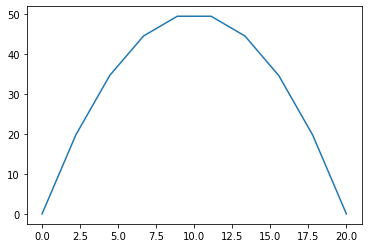

In [4]:
plt.figure()
plt.plot(xs,ys)
plt.show()

On peut voir comment la fonction se comporte quand on change $\alpha$:

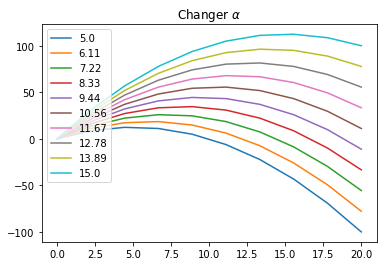

In [ ]:
alphas = np.linspace(5,15,10)
beta = 1.0
plt.figure()
for alpha in alphas: 
    fval = f(xs,alpha,beta)
    plt.plot(xs,fval,label=str(np.round(alpha,2)))
plt.legend(loc=2)
plt.title("Changer $\\alpha$")
plt.show()

Même chose avec $\beta$: 

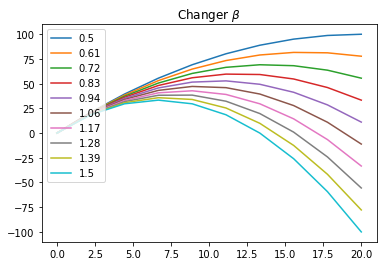

In [ ]:
betas = np.linspace(0.5,1.5,10)
alpha = 10.0
plt.figure()
for beta in betas: 
    plt.plot(xs,f(xs,alpha,beta),label=str(np.round(beta,2)))
plt.legend(loc=2)
plt.title("Changer $\\beta$")
plt.show()

Maintenant programmons la dérivée de la fonction. La dérivée est $$ f'(x) = \alpha - \beta x $$ 

In [ ]:
def df(x,alpha,beta):
    return alpha - beta*x

Graphiquement on a :

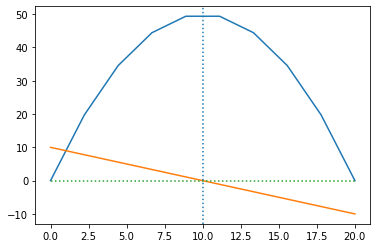

In [ ]:
alpha = 10
beta = 1.0
ys = f(xs,alpha,beta)
dys = df(xs,alpha,beta)
plt.figure()
plt.plot(xs,ys,label='fonction')
plt.plot(xs,dys,label='dérivée')
plt.axvline(x=10.0,linestyle=':')
plt.plot(xs,np.zeros(len(xs)),linestyle=':')

Peut-on trouver une dérivée numériquement (quand on ne connait pas la fonction)? Oui, on fait des différences petites: 

In [ ]:
def dfn(x,alpha,beta,eps=1e-6):
    return (f(x+eps,alpha,beta) - f(x-eps,alpha,beta))/(2*eps)

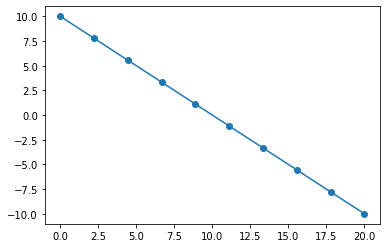

In [ ]:
alpha = 10
beta = 1.0
dys = df(xs,alpha,beta)
dnys = dfn(xs,alpha,beta)
plt.figure()
plt.scatter(xs,dnys,label='numérique')
plt.plot(xs,dys,label='exacte')
plt.show()

Pas mal comme approximation...

## Maximisation sans contrainte

Reprenons la même fonction. Nous cherchons le maximum. Bien sur il est donné par :
    $$ f'(x) = \alpha - \beta x^* = 0 $$
et donc $x^* = \frac{\alpha}{\beta}$. 

In [ ]:
xopt = alpha/beta
xopt

10.0

On appelle cette solution la solution analytique. Bien sur, on peut la trouver numériquement. Commencons par regarder sur une grille la valeur de la dérivée: 

In [ ]:
dys = df(xs,alpha,beta)
[(i,di) for i,di in zip(xs,dys)]

[(0.0, 10.0),
 (2.2222222222222223, 7.777777777777778),
 (4.444444444444445, 5.555555555555555),
 (6.666666666666667, 3.333333333333333),
 (8.88888888888889, 1.1111111111111107),
 (11.11111111111111, -1.1111111111111107),
 (13.333333333333334, -3.333333333333334),
 (15.555555555555557, -5.555555555555557),
 (17.77777777777778, -7.777777777777779),
 (20.0, -10.0)]

On voit que entre 8.88 et 11.11, la derivée change de signe. Donc, on pourrait chercher dans cet interval avec une nouvelle grille

In [ ]:
xxs = np.linspace(8.88,11.11,10)
[(i,di) for i,di in zip(xxs,df(xxs,alpha,beta))]

[(8.88, 1.1199999999999992),
 (9.127777777777778, 0.8722222222222218),
 (9.375555555555556, 0.6244444444444444),
 (9.623333333333333, 0.3766666666666669),
 (9.87111111111111, 0.1288888888888895),
 (10.11888888888889, -0.11888888888888971),
 (10.366666666666667, -0.36666666666666714),
 (10.614444444444445, -0.6144444444444446),
 (10.862222222222222, -0.862222222222222),
 (11.11, -1.1099999999999994)]

On voit qu'il y a changement de signe entre 9.87 et 10.11. On peut donc créer une nouvelle grille jusqu'à ce que la borne inférieure et supérieure soient très près de l'autre (disons 1e-6). C'est une façon de faire mais ce n'est pas très efficace. Une autre façon est d'utiliser ce qu'on appelle la bisection. La bisection est très simple (voir [cet article](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_dichotomie) wikipedia si cela vous intéresse). Elle regarde un point entre le maximum et le minimum. Si la dérivé a le même signe que le maximum actuel, on sait que le minimum se trouve en dessous de ce maximum. Donc, on remplace le maximum par ce point. On fait la même chose de l'autre côté. À force de couper l'espace en deux. On fini par trouver notre maximum. 

In [ ]:
op.bisect(df,np.min(xs),np.max(xs),args=(alpha,beta))

10.0

On peut aussi maximiser la fonction directement. Or Python n'a que des minimisateurs. Or minimiser une fonction c'est maximiser le négatif de la fonction...

In [ ]:
fm = lambda x: -f(x,alpha,beta)
opt =op.minimize_scalar(fm,method='golden')
opt.x

10.000000052198015